<a href="https://colab.research.google.com/github/poojar-30/TASK1-THE-SPARKS-FOUNDATION-INTERNSHIP/blob/main/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION


## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP 

### Prediction using Supervised ML
> ### -BY POOJA R

> QUESTION: What will be predicted score if a student studies for 9.25 hrs/ day?

#### Importing libraries

In [33]:
import pandas as pd               #for data analysis
import missingno as msn           #for visualising missing number of data
import matplotlib.pyplot as plt   #for data visualisation
import seaborn as sns             #for data visualisation
import numpy as np                #general-purpose array-processing package.
from sklearn import linear_model  #Linear regression model
from sklearn.model_selection import train_test_split #train and split data

### READ THE DATA!

In [34]:

df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### CHECK FOR NULL VALUES

In [35]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

##### visualising null values



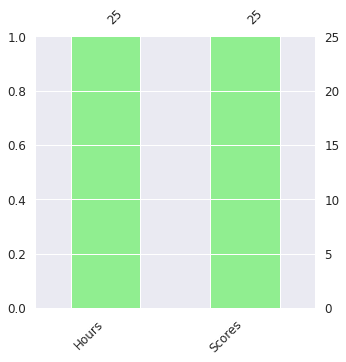

In [36]:
msn.bar(df,figsize=(5,5), fontsize=12, color="lightgreen")

### LETS VISUALIZE

> COUNTPLOT

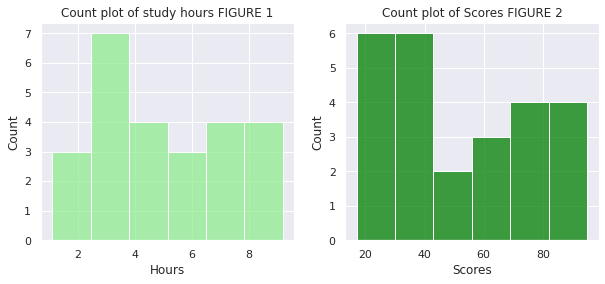

In [37]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title("Count plot of study hours FIGURE 1")
sns.set_theme(style="darkgrid")
sns.histplot(df["Hours"],color="lightgreen")

plt.subplot(1, 2, 2)
plt.title("Count plot of Scores FIGURE 2")
sns.set_theme(style="darkgrid")
sns.histplot(df["Scores"],color="green")

According to figure 1, most  of the student studied 3-4hrs.



According to figure 2, few students got highest score.

> LETS CHECK ITS CORRELATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


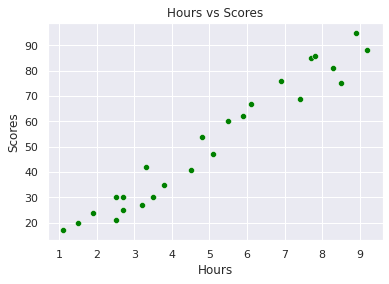

In [38]:
plt.title("Hours vs Scores")

sns.set_theme(style="darkgrid")
sns.scatterplot(df["Hours"],df["Scores"],color="green")

Its is correlated, infact it has positive correlation

In [39]:
correlation = np.corrcoef(df['Hours'],df['Scores'])
correlation

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

corrcoef :- gives the correlation matrix 


*HIGHLY CORRELATED*

In [40]:
x = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values  #dependent variable vector


In [41]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [42]:
# REGRESSION
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

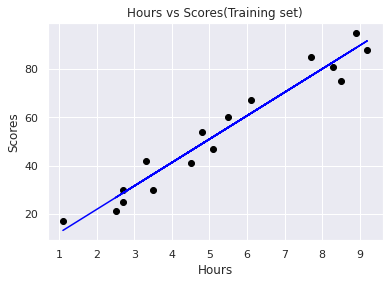

In [43]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, reg.predict(x_train), color='blue')
 
plt.title("Hours vs Scores(Training set)") # stating the title of the graph
 
plt.xlabel("Hours") # adding the name of x-axis
plt.ylabel("Scores") # adding the name of y-axis
plt.show()

In [44]:
reg.coef_   # this is slope

array([9.69062469])

In [45]:
reg.intercept_  #this is intercept/constant

2.5069547569547197

In [46]:
y=reg.predict(x_test)


In [47]:
data=pd.DataFrame({'Actual Values':y_test,'Predicted values':y})
data

,Actual Values,Predicted values
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


Text(0, 0.5, 'Scores')

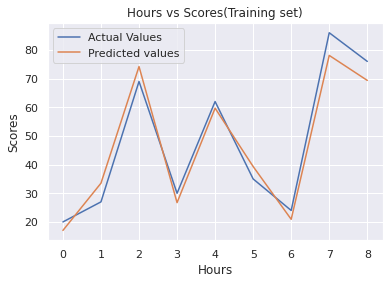

In [48]:
data.plot()
 
plt.title("Hours vs Scores(Training set)") # stating the title of the graph
 
plt.xlabel("Hours") # adding the name of x-axis
plt.ylabel("Scores") # adding the name of y-axis

In [49]:
Q=[[9.25]]
ANSWER=reg.predict(Q)
ANSWER

array([92.14523315])